In [263]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

In [264]:
# Load the csv file
csv_file = "../csv_data/data.csv"
#csv_file = "../csv_data/data50iter95toler.csv"

# Create pandas variables
pretty_print = pd.read_csv(csv_file)
df = pretty_print


### DF will be used for computations
# Compute speedup
df['Speedup'] = (df['Exact algorithm time'] / df['Approximation algorithm time']).apply(lambda x: f"{x:.4f}")

# Get weight from name
df['Weight'] = df['Name'].str.extract(r'weight(\d+)').astype(int)

# Round up and add % symbol
df['Confidence interval'] = ((1 - (df['Tolerance'] / df['Weight'])) * 100).apply(lambda x: f"{x:.3f}%")

# Set the place where we will move the Weight column
cols = list(df.columns)
cols.remove('Weight')
insert_index = cols.index('Tolerance') + 1
cols.insert(insert_index, 'Weight')

df = df[cols]

### Pretty print will be used to display the generated values
# Compute Speedup
pretty_print['Speedup'] = (pretty_print['Exact algorithm time'] / pretty_print['Approximation algorithm time']).apply(lambda x: f"{x:.4f}")

# Prettify Approximate time
pretty_print['Approximation algorithm time'] = pretty_print['Approximation algorithm time'].apply(lambda x: f"{x:.3f}s").astype(str)
# Prettify Exact time
pretty_print['Exact algorithm time'] = pretty_print['Exact algorithm time'].apply(lambda x: f"{x:.3f}s").astype(str)

# Add a % symbol
pretty_print['Accuracy'] = pretty_print['Accuracy'].apply(lambda x: f"{x:.2f}%")

# Round up and add % symbol
pretty_print['Confidence interval'] = ((1 - (pretty_print['Tolerance'] / pretty_print['Weight'])) * 100).apply(lambda x: f"{x:.3f}%")

# Set the place where we will move the Weight column
cols = list(pretty_print.columns)
cols.remove('Weight')
insert_index = cols.index('Tolerance') + 1
cols.insert(insert_index, 'Weight')

pretty_print = pretty_print[cols]

pretty_print

,Name,Exact algorithm time,Approximation algorithm time,Accuracy,Tolerance,Weight,Iteration modifier,Speedup,Confidence interval
0,graph-nodes208-seed101-prob0.4-weight100-toler...,6.282s,2.795s,43.12%,5.0,100,0.5,2.2474,95.000%
1,graph-nodes206-seed102-prob0.4-weight100-toler...,6.783s,3.559s,38.65%,5.0,100,0.5,1.9058,95.000%
2,graph-nodes214-seed105-prob0.4-weight100-toler...,7.631s,5.288s,57.44%,5.0,100,0.7,1.4430,95.000%
3,graph-nodes201-seed103-prob0.4-weight100-toler...,5.926s,1.897s,26.38%,5.0,100,0.3,3.1235,95.000%
4,graph-nodes200-seed104-prob0.4-weight100-toler...,6.456s,3.273s,42.80%,5.0,100,0.5,1.9724,95.000%
...,...,...,...,...,...,...,...,...,...
877,graph-nodes312-seed200-prob0.3-weight200-toler...,22.384s,11.144s,27.74%,10.0,200,0.5,2.0085,95.000%
878,graph-nodes312-seed205-prob0.3-weight200-toler...,24.774s,17.113s,66.07%,10.0,200,0.7,1.4476,95.000%
879,graph-nodes314-seed200-prob0.3-weight200-toler...,22.968s,11.306s,30.98%,10.0,200,0.5,2.0315,95.000%
880,graph-nodes314-seed205-prob0.3-weight200-toler...,23.441s,15.760s,62.03%,10.0,200,0.7,1.4874,95.000%


In [281]:
# Change type into float
df['Speedup'] = df['Speedup'].astype(float)

# Drop infinite values
#df = df[~df['Speedup'].isin([np.inf, -np.inf])]
#df = df.dropna()

# Cut off any bad values
#df = df[df['Speedup'] <= 20]

df

,Name,Exact algorithm time,Approximation algorithm time,Accuracy,Tolerance,Weight,Iteration modifier,Speedup,Confidence interval
0,graph-nodes208-seed101-prob0.4-weight100-toler...,6.282476,2.795444,43.12,5.0,100,0.5,2.2474,95.000%
1,graph-nodes206-seed102-prob0.4-weight100-toler...,6.782873,3.559142,38.65,5.0,100,0.5,1.9058,95.000%
2,graph-nodes214-seed105-prob0.4-weight100-toler...,7.630839,5.288001,57.44,5.0,100,0.7,1.4430,95.000%
3,graph-nodes201-seed103-prob0.4-weight100-toler...,5.926310,1.897360,26.38,5.0,100,0.3,3.1235,95.000%
4,graph-nodes200-seed104-prob0.4-weight100-toler...,6.455877,3.273077,42.80,5.0,100,0.5,1.9724,95.000%
...,...,...,...,...,...,...,...,...,...
877,graph-nodes312-seed200-prob0.3-weight200-toler...,22.383729,11.144382,27.74,10.0,200,0.5,2.0085,95.000%
878,graph-nodes312-seed205-prob0.3-weight200-toler...,24.773721,17.113237,66.07,10.0,200,0.7,1.4476,95.000%
879,graph-nodes314-seed200-prob0.3-weight200-toler...,22.968497,11.306149,30.98,10.0,200,0.5,2.0315,95.000%
880,graph-nodes314-seed205-prob0.3-weight200-toler...,23.441166,15.759668,62.03,10.0,200,0.7,1.4874,95.000%


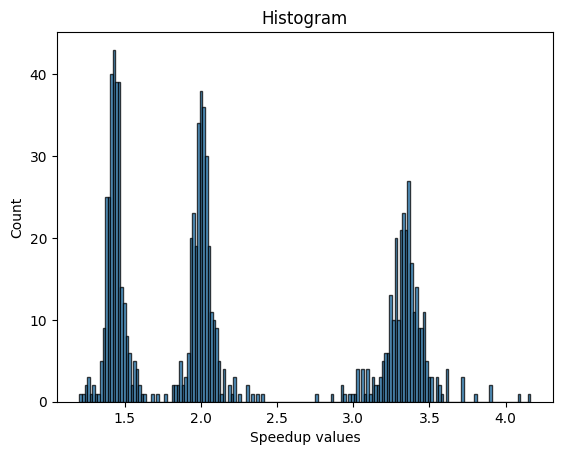

In [282]:
df['Speedup'] = pd.to_numeric(df['Speedup'], errors='coerce')

n_bins = (df.shape[0] // 10) * 2

df['Speedup'].plot.hist(bins=n_bins, alpha=0.75, edgecolor='black')

# Přidání popisků
plt.title("Histogram")
plt.xlabel("Speedup values")
plt.ylabel("Count")
#plt.grid(True, linestyle='--', alpha=0.6)

# Zobrazení grafu
plt.show()

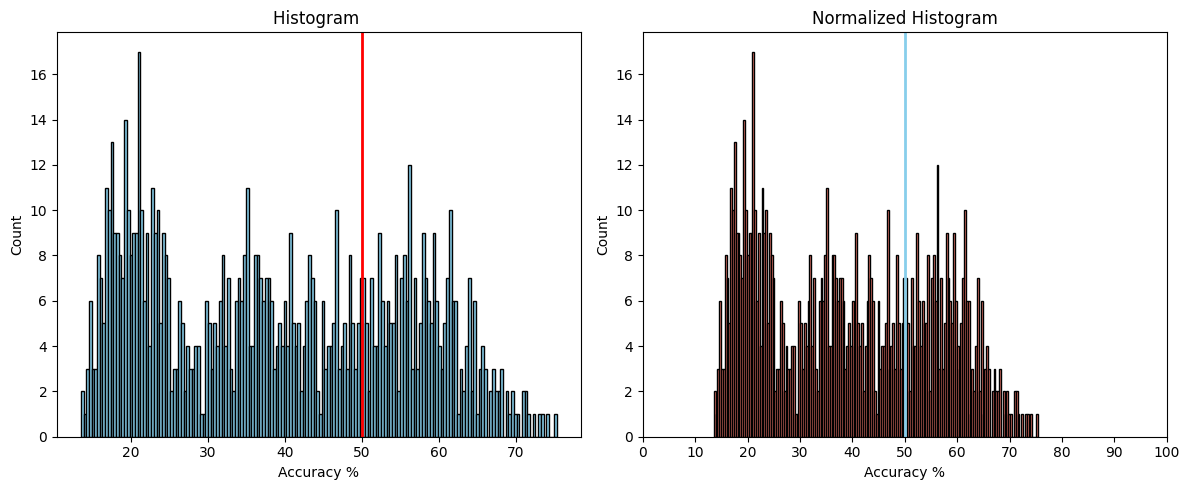

In [283]:
df['Accuracy'] = pd.to_numeric(df['Accuracy'], errors='coerce')

n_bins = (df.shape[0] // 10) * 2

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df['Accuracy'].plot(kind='hist', bins=n_bins, ax=axes[0], color='skyblue', edgecolor="black")
axes[0].set_title('Histogram ')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Accuracy %')
axes[0].axvline(50, color='red', linestyle='-', linewidth=2, label='50%')
#axes[0].grid(True, linestyle='-', alpha=0.8)

df['Accuracy'].plot(kind='hist', bins=n_bins, ax=axes[1], color='salmon', edgecolor="black")
axes[1].set_title('Normalized Histogram')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Accuracy %')
axes[1].set_xlim(0, 100)
axes[1].axvline(50, color='skyblue', linestyle='-', linewidth=2, label='50%')
axes[1].set_xticks(np.arange(0, 101, 10))
#axes[1].grid(True, linestyle='--', alpha=0.8)





plt.tight_layout()
plt.show()

,Name,Exact algorithm time,Approximation algorithm time,Accuracy,Tolerance,Weight,Iteration modifier,Speedup,Confidence interval
443,graph-nodes307-seed201-prob0.3-weight200-toler...,22.165690,14.622529,49.71,10.0,200,0.7,1.5159,95.000%
445,graph-nodes301-seed201-prob0.3-weight200-toler...,20.692514,14.335765,53.71,10.0,200,0.7,1.4434,95.000%
448,graph-nodes317-seed203-prob0.3-weight200-toler...,23.175611,16.251361,56.05,10.0,200,0.7,1.4261,95.000%
451,graph-nodes311-seed203-prob0.3-weight200-toler...,22.444983,15.038549,70.95,10.0,200,0.7,1.4925,95.000%
453,graph-nodes320-seed201-prob0.3-weight200-toler...,24.493612,16.963086,61.13,10.0,200,0.7,1.4439,95.000%
...,...,...,...,...,...,...,...,...,...
865,graph-nodes303-seed202-prob0.3-weight200-toler...,20.180278,14.046552,58.57,10.0,200,0.7,1.4367,95.000%
866,graph-nodes319-seed200-prob0.3-weight200-toler...,24.438322,19.528904,50.76,10.0,200,0.7,1.2514,95.000%
871,graph-nodes318-seed205-prob0.3-weight200-toler...,23.642571,16.512050,52.10,10.0,200,0.7,1.4318,95.000%
878,graph-nodes312-seed205-prob0.3-weight200-toler...,24.773721,17.113237,66.07,10.0,200,0.7,1.4476,95.000%


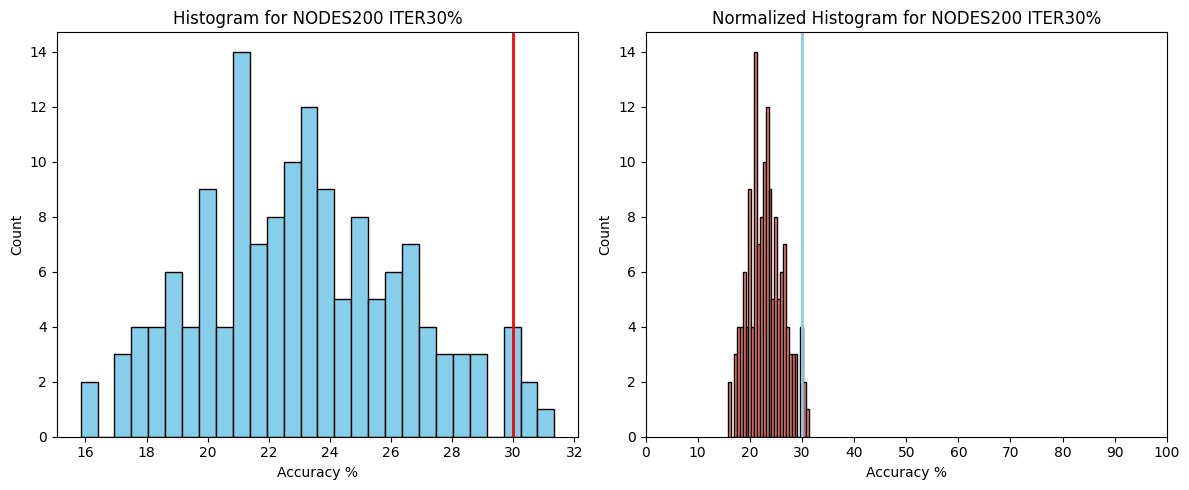

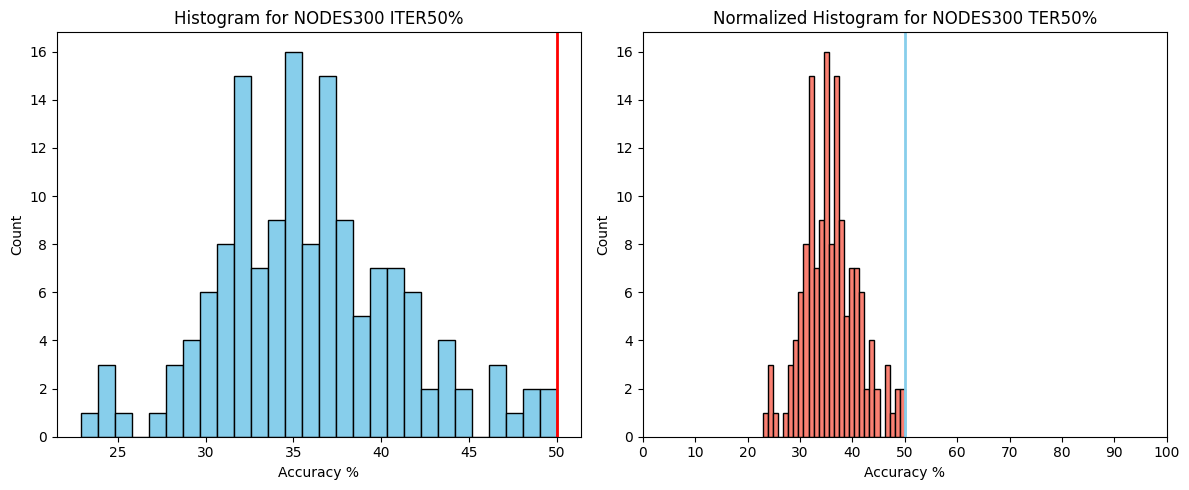

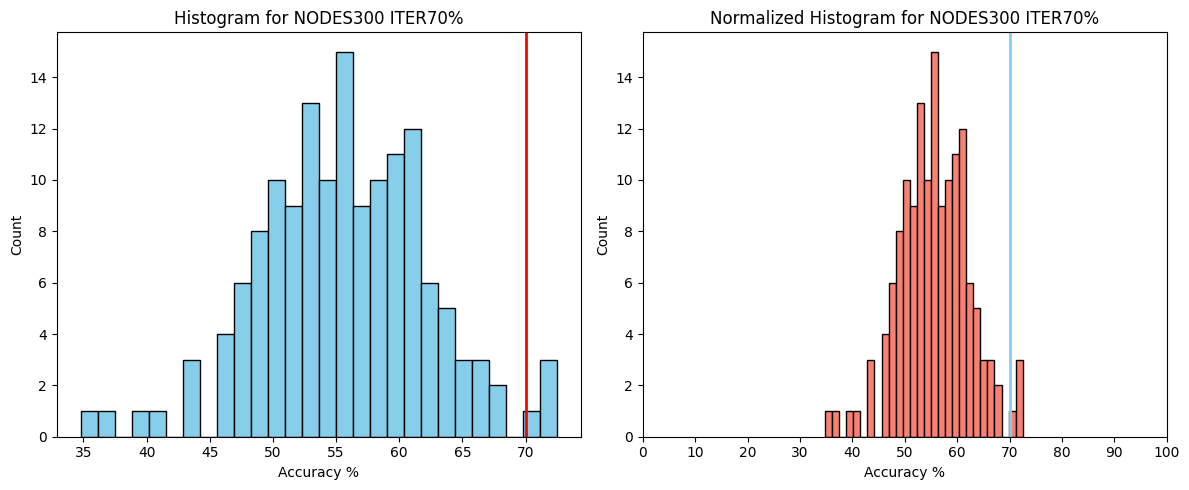

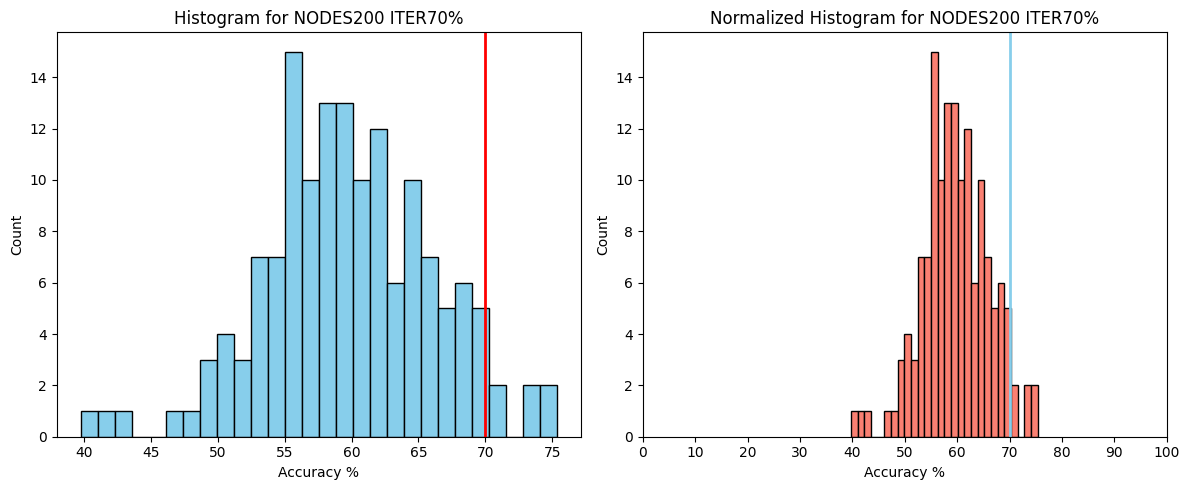

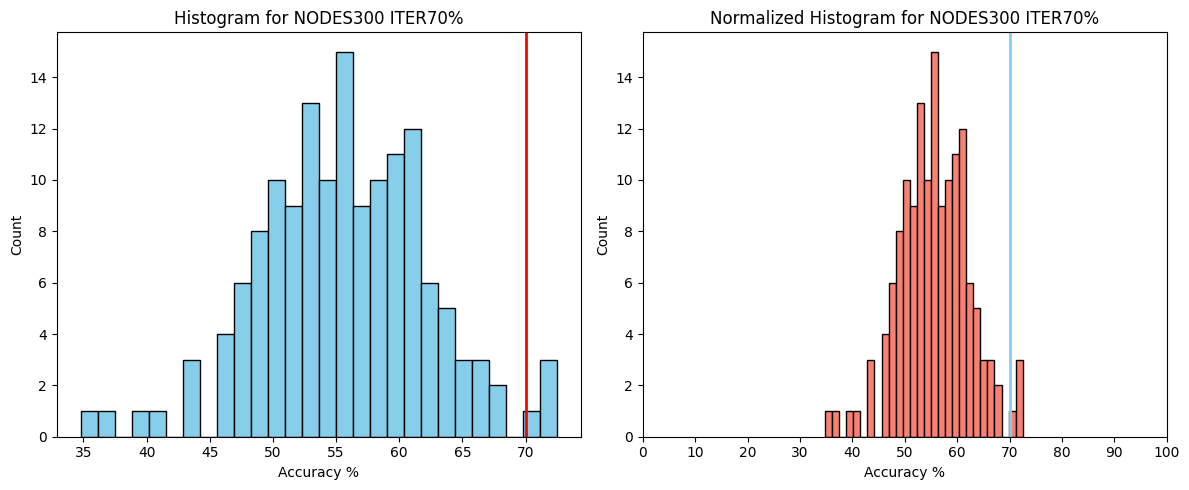

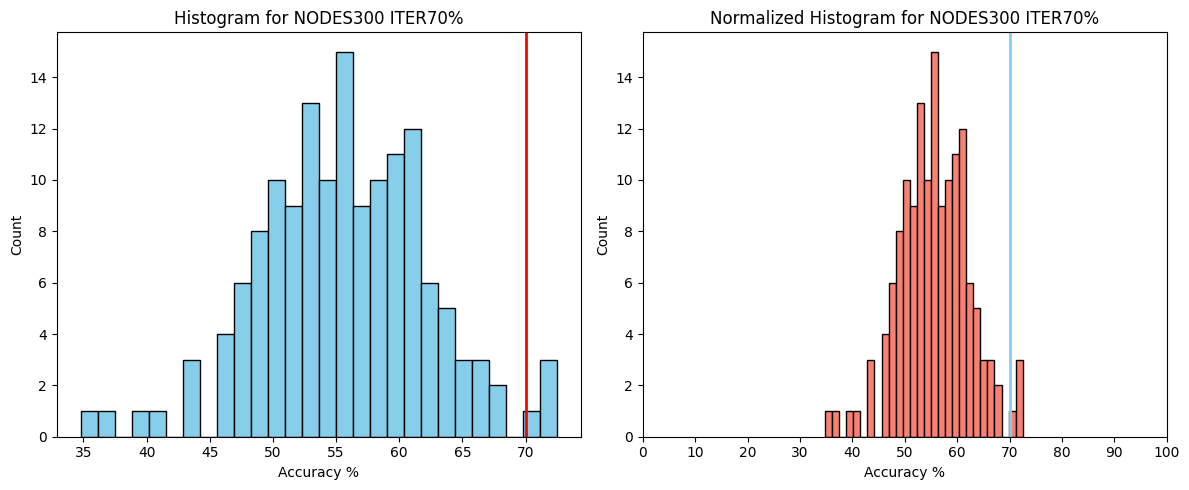

In [292]:


for i in range(6):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    if (i % 3) == 0:

        nodes_condition = df['Name'].str.contains(r'nodes2\d{2}')  # Nodes contain 2XX
        
        if i == 0:
            iteration_condition = df['Iteration modifier'] == 0.3  # Iteration Modifier == 0.3
            line = 30
            axes[0].set_title('Histogram for NODES200 ITER30%')
            axes[1].set_title('Normalized Histogram for NODES200 ITER30%')
        elif i == 1:
            iteration_condition = df['Iteration modifier'] == 0.5  # Iteration Modifier == 0.5
            line = 50
            axes[0].set_title('Histogram for NODES200 ITER50%')
            axes[1].set_title('Normalized Histogram for NODES200 ITER50%')
        else:
            iteration_condition = df['Iteration modifier'] == 0.7  # Iteration Modifier == 0.7
            line = 70
            axes[0].set_title('Histogram for NODES200 ITER70%')
            axes[1].set_title('Normalized Histogram for NODES200 ITER70%')

        # Get the data
        df1 = df[nodes_condition & iteration_condition]

    else:

        nodes_condition = df['Name'].str.contains(r'nodes3\d{2}')  # Nodes contain 3XX

        if i == 0:
            iteration_condition = df['Iteration modifier'] == 0.3  # Iteration Modifier == 0.3
            line = 30
            axes[0].set_title('Histogram for NODES300 ITER30%')
            axes[1].set_title('Normalized Histogram for NODES300 ITER30%')
        elif i == 1:
            iteration_condition = df['Iteration modifier'] == 0.5  # Iteration Modifier == 0.5
            line = 50
            axes[0].set_title('Histogram for NODES300 ITER50%')
            axes[1].set_title('Normalized Histogram for NODES300 TER50%')
        else:
            iteration_condition = df['Iteration modifier'] == 0.7  # Iteration Modifier == 0.7
            line = 70
            axes[0].set_title('Histogram for NODES300 ITER70%')
            axes[1].set_title('Normalized Histogram for NODES300 ITER70%')

        df1 = df[nodes_condition & iteration_condition]


    df1.loc[:, 'Accuracy'] = pd.to_numeric(df1['Accuracy'], errors='coerce')

    n_bins = (df1.shape[0] // 10) * 2

    df1['Accuracy'].plot(kind='hist', bins=n_bins, ax=axes[0], color='skyblue', edgecolor="black")
    axes[0].set_ylabel('Count')
    axes[0].set_xlabel('Accuracy %')
    axes[0].axvline(line, color='red', linestyle='-', linewidth=2, label='50%')
    #axes[0].grid(True, linestyle='-', alpha=0.8)

    df1['Accuracy'].plot(kind='hist', bins=n_bins, ax=axes[1], color='salmon', edgecolor="black")

    axes[1].set_ylabel('Count')
    axes[1].set_xlabel('Accuracy %')
    axes[1].set_xlim(0, 100)
    axes[1].axvline(line, color='skyblue', linestyle='-', linewidth=2, label='50%')
    axes[1].set_xticks(np.arange(0, 101, 10))
    #axes[1].grid(True, linestyle='--', alpha=0.8)

    plt.tight_layout()
    plt.show()

In [ ]:
for i in range(6):

    df2.loc[:, 'Speedup'] = pd.to_numeric(df['Speedup'], errors='coerce')

df['Speedup'] = pd.to_numeric(df['Speedup'], errors='coerce')

n_bins = (df.shape[0] // 10) * 2

df['Speedup'].plot.hist(bins=n_bins, alpha=0.75, edgecolor='black')

# Přidání popisků
plt.title("Histogram")
plt.xlabel("Speedup values")
plt.ylabel("Count")
#plt.grid(True, linestyle='--', alpha=0.6)

# Zobrazení grafu
plt.show()